In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# First 5 rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Drop unnecessary columns
df.drop(columns=[
    'EmployeeCount',
    'EmployeeNumber',
    'Over18',
    'StandardHours'
], inplace=True)

In [5]:
# Encoding target variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

df['Attrition'].value_counts()

,count
Attrition,
0,1233
1,237


In [6]:
# Identifying categorical columns
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [7]:
# Applying Label Encoding
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


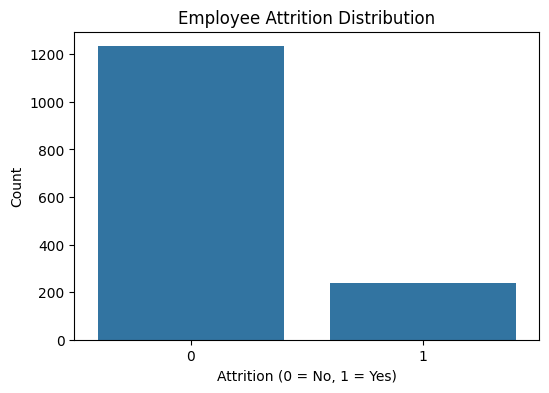

In [8]:
# Exploratory Data Analysis (EDA)
# Attrition Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title('Employee Attrition Distribution')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

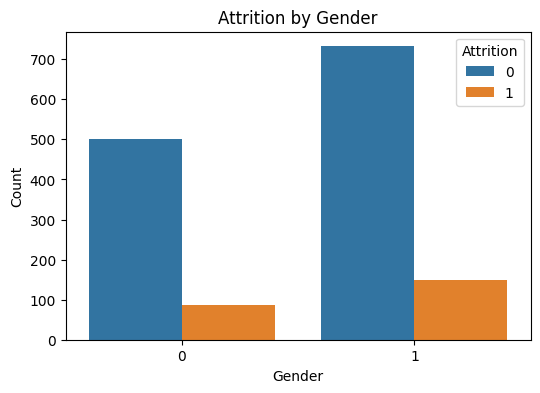

In [9]:
# Attrition by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

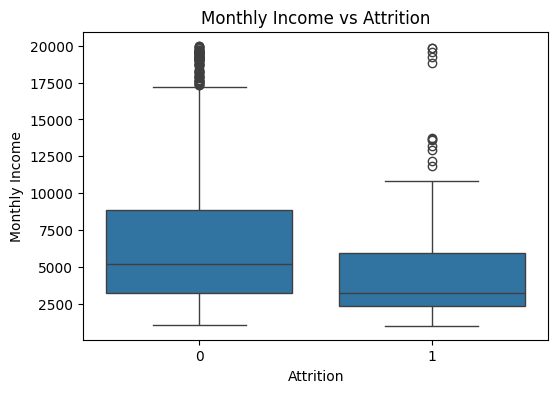

In [10]:
# Monthly Income vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

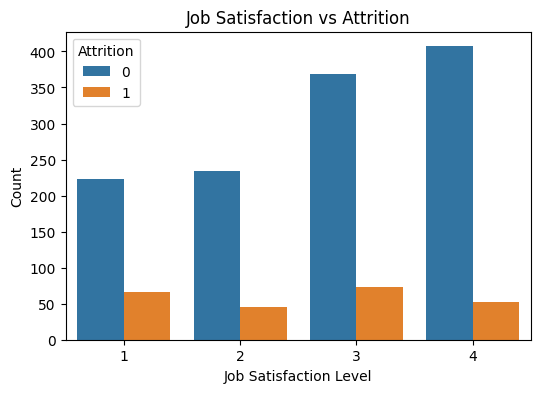

In [11]:
# Job Satisfaction vs Attrition
plt.figure(figsize=(6,4))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Job Satisfaction vs Attrition')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')
plt.show()

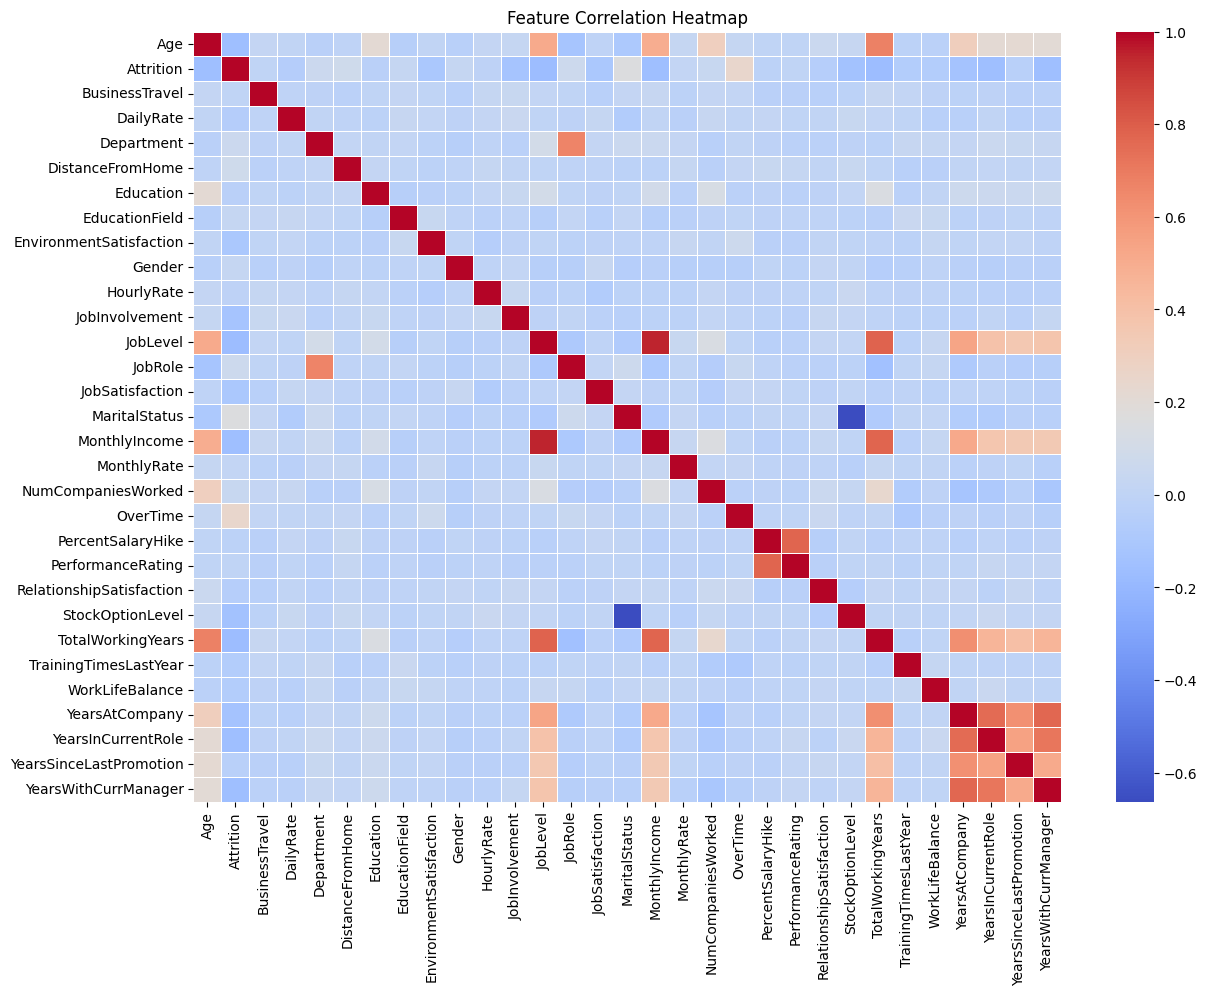

In [12]:
# Correlation Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [13]:
# Feature Selection (X) and Target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [14]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (1102, 30)
Test set size: (368, 30)


In [15]:
# Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Training Model - Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8641304347826086
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       309
           1       0.66      0.32      0.43        59

    accuracy                           0.86       368
   macro avg       0.77      0.64      0.68       368
weighted avg       0.85      0.86      0.84       368



In [17]:
# Training Model - Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7690217391304348
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       309
           1       0.26      0.24      0.25        59

    accuracy                           0.77       368
   macro avg       0.56      0.55      0.56       368
weighted avg       0.76      0.77      0.76       368



In [18]:
# Training Model - Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8396739130434783
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       309
           1       0.50      0.12      0.19        59

    accuracy                           0.84       368
   macro avg       0.68      0.55      0.55       368
weighted avg       0.80      0.84      0.80       368



In [19]:
# Model Performance Comparison
model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ]
})

model_performance

,Model,Accuracy
0,Logistic Regression,0.864130
1,Decision Tree,0.769022
2,Random Forest,0.839674


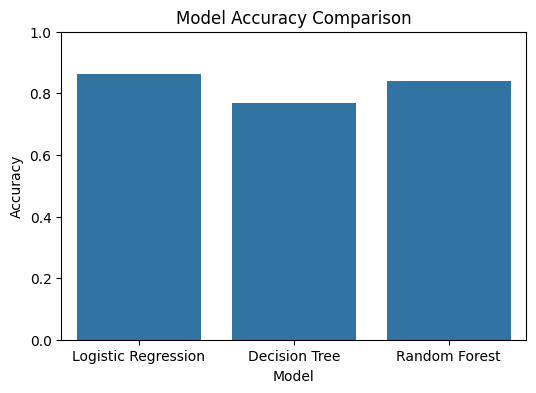

In [20]:
# Accuracy Comparison
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='Accuracy', data=model_performance)
plt.title('Model Accuracy Comparison')
plt.ylim(0,1)
plt.show()